##### Note:- We can use Wine quality dataset and Student Performance Data set as per the discussion in lecture.

#### Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.

Ans: The wine quality dataset contains 11 features, including the target variable 'quality' which is a score between 0 and 10. The other features include:

- fixed acidity: the concentration of acid in the wine
- volatile acidity: the amount of acetic acid in the wine
- citric acid: the amount of citric acid in the wine
- residual sugar: the amount of sugar left after fermentation
- chlorides: the amount of salt in the wine
- free sulfur dioxide: the amount of SO2 that is not bound to other molecules in the wine
- total sulfur dioxide: the amount of SO2 in the wine
- density: the density of the wine
- pH: the pH level of the wine
- sulphates: the amount of sulfur compounds in the wine

#### Q2. How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.

Ans: There are different ways to handle missing data in the wine quality dataset. One approach is to drop the rows with missing values, but this can result in a loss of data and may not be feasible if there are many missing values. Another approach is to impute the missing values, which involves estimating the missing values based on the values of other variables in the dataset. Common imputation techniques include mean imputation, median imputation, and k-nearest neighbor imputation.

Mean imputation involves replacing the missing values with the mean value of the variable. This is a simple and fast method but can lead to biased estimates if the missing values are not missing at random. Median imputation is similar but uses the median value instead of the mean. K-nearest neighbor imputation involves finding the k nearest observations with complete data and using their values to impute the missing values. This method can be more accurate but is computationally intensive and may not be appropriate for large datasets.

#### Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?

Ans: he key factors that affect students' performance in exams may include various personal, social, and academic factors. Personal factors may include intelligence, motivation, and personality traits, while social factors may include family background, peer pressure, and school environment. Academic factors may include prior knowledge, study habits, and teacher quality. To analyze these factors using statistical techniques, we could use regression analysis to identify the variables that are most strongly associated with exam performance. We could also use hypothesis testing to compare the means of different groups, such as male and female students or students from different socioeconomic backgrounds.

#### Q4. Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?

Ans: Feature engineering in the context of the student performance dataset involves selecting and transforming the variables in the dataset to create new features that may be more informative for predicting exam performance. For example, we could create a new feature based on the students' socio-economic status by combining information about their parents' education level and occupation. We could also transform the variables to make them more suitable for modeling, such as normalizing the exam scores to have a mean of 0 and a standard deviation of 1. Other possible transformations include creating dummy variables for categorical variables and scaling numerical variables to a common range. The goal of feature engineering is to create a set of features that capture the most important information in the data and improve the performance of the predictive model.

#### Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?

In [2]:
pip install seaborn

                                              0.0/293.3 kB ? eta -:--:--
     --------------                         112.6/293.3 kB 3.3 MB/s eta 0:00:01
     --------------                         112.6/293.3 kB 3.3 MB/s eta 0:00:01
     --------------                         112.6/293.3 kB 3.3 MB/s eta 0:00:01
     -------------------------------        245.8/293.3 kB 1.4 MB/s eta 0:00:01
     -------------------------------        245.8/293.3 kB 1.4 MB/s eta 0:00:01
     -------------------------------        245.8/293.3 kB 1.4 MB/s eta 0:00:01
     ------------------------------------ 293.3/293.3 kB 904.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


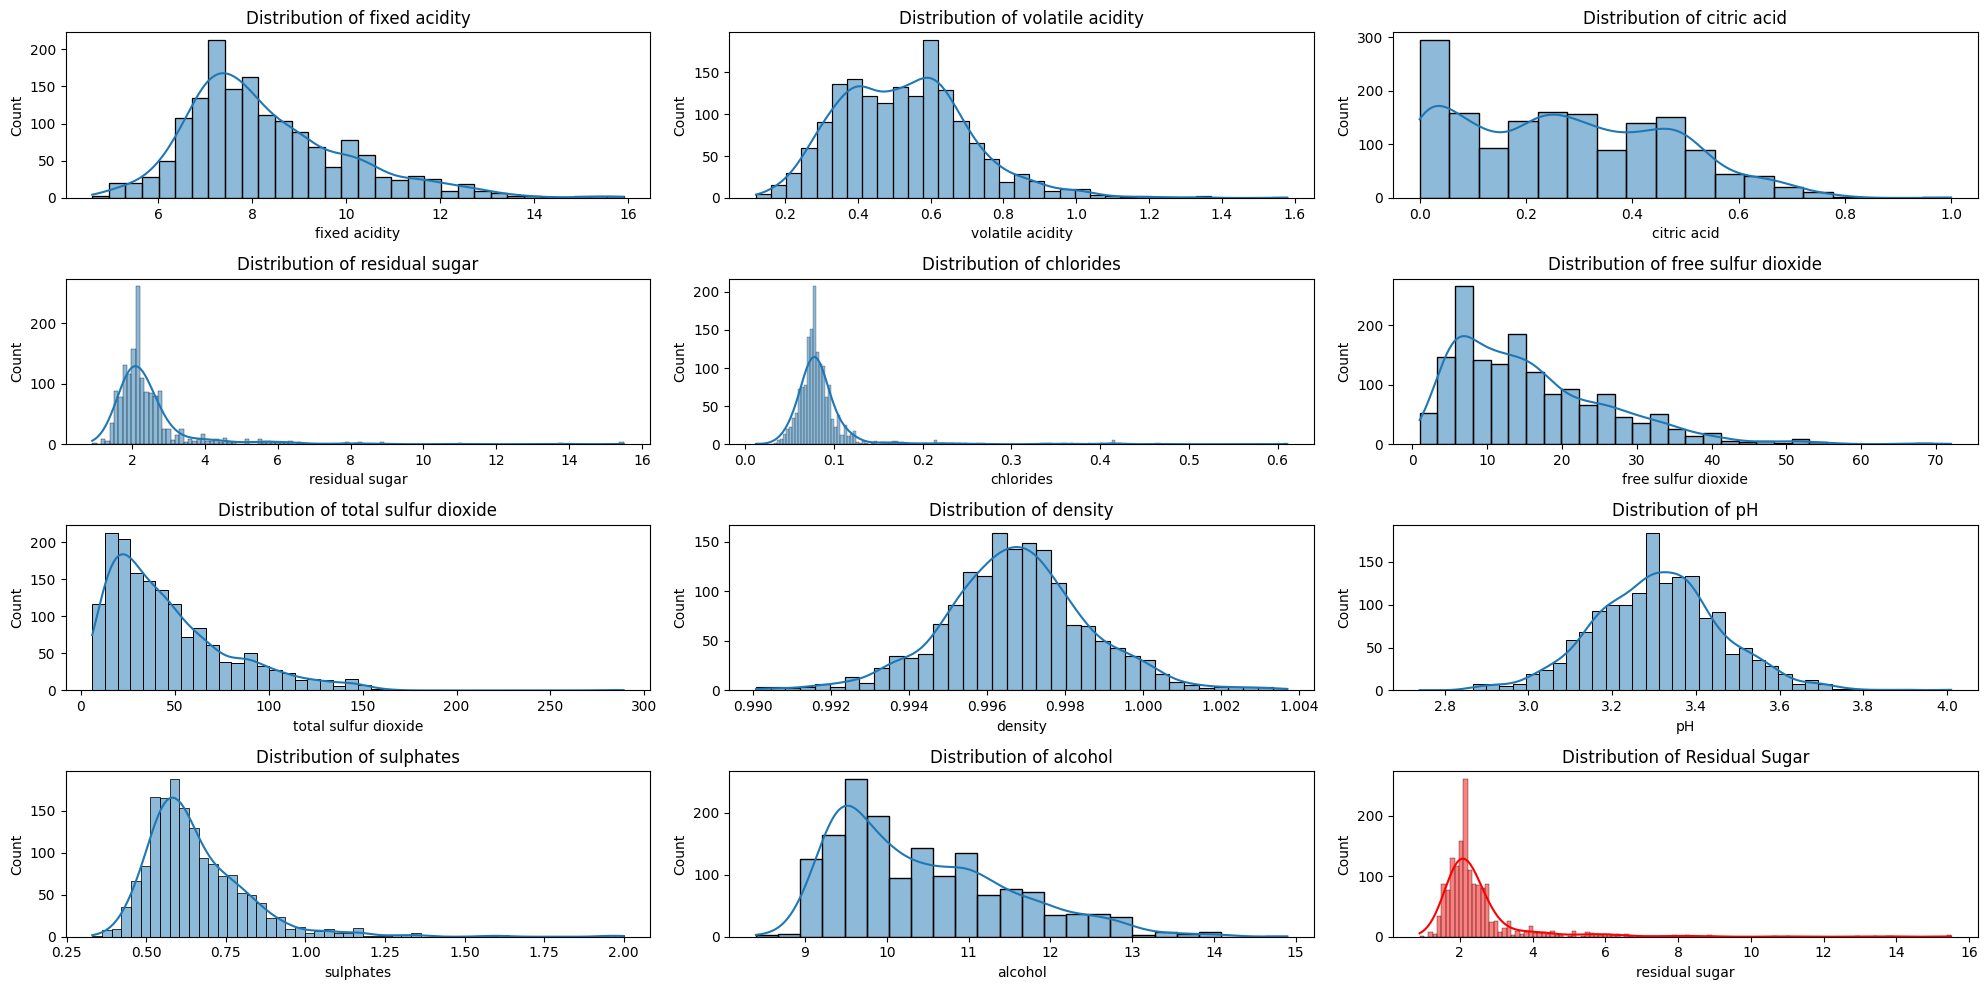

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the red wine quality dataset
wine_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')

# EDA to identify the distribution of each feature
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(20,10))
axs = axs.flatten()
for i, col in enumerate(wine_df.columns[:-1]):
    sns.histplot(data=wine_df, x=col, kde=True, ax=axs[i], alpha=0.5)
    axs[i].set_title(f"Distribution of {col}")

# Identify features that exhibit non-normality
sns.histplot(data=wine_df, x="residual sugar", kde=True, alpha=0.5, color='red')
plt.title("Distribution of Residual Sugar")
plt.tight_layout()

- To improve normality, we could apply a log transformation or a Box-Cox transformation to this feature.

#### Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of features. What is the minimum number of principal components required to explain 90% of the variance in the data?

In [18]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the red wine quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, delimiter=";")

# Separate the features from the target variable
X = df.drop("quality", axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA and retain enough components to explain 90% of the variance
pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(X_scaled)

print(f"Number of features: {pca.n_features_in_}")
print(f"Number of retained components: {pca.n_components_}")

Number of features: 11
Number of retained components: 7
